In [3]:
pip install pandas seaborn matplotlib gradio ollama

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load Titanic Dataset
url = r"/content/titanic_ dataset_final.csv"
df = pd.read_csv(url)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [6]:
# Display dataset info
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
# Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


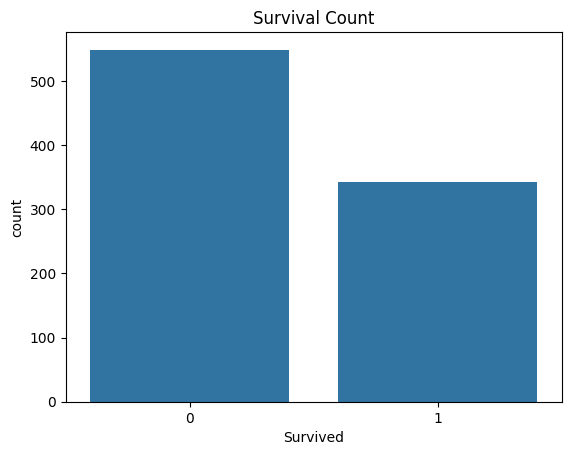

In [8]:
# Surival Rate Visulization
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

In [29]:
# Install Ollama
!curl -fsSL https://ollama.com/install.sh | sh

# Pull the mistral model
!ollama pull mistral

import subprocess
import time
import ollama
import pandas as pd

# Start Ollama in the background
process = subprocess.Popen(["/usr/local/bin/ollama", "serve"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(5)  # Give Ollama some time to start

# Use the existing DataFrame
df_summary = df.describe().to_string()

def generate_insights(summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Generate AI Insights
insights = generate_insights(df_summary)
print("\nüß† AI-Generated Insights:\n", insights)

# Stop the Ollama server
process.terminate()

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
Error: ollama server not responding - could not connect to ollama server, run 'ollama serve' to start it

üß† AI-Generated Insights:
  The dataset provided is from the Titanic data, which includes information about passengers who embarked on the RMS Titanic for its maiden voyage from Southampton to New York City in 1912. Here are some insights based on the summary:

1. There are a total of 891 unique passengers in the dataset, with no missing values in any column.

2. The mean age of passengers is approximately 29.7 years old, but the standard deviatio

In [31]:
import gradio as gr
import pandas as pd

def generate_insights(summary):
    # Example dummy insight generator
    return "Insights will be generated here based on the summary."

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return summary + "\n\n" + insights

# ‚úÖ Create web interface OUTSIDE the function
demo = gr.Interface(
    fn=eda_analysis,
    inputs="file",
    outputs="text",
    title="AI-Powered EDA with Mistral"
)

# ‚úÖ Launch the app (with share=True for Colab)
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3e97b1370809e94563.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [25]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [35]:
# ‚úÖ Install necessary libraries
!pip install gradio pandas matplotlib seaborn pillow

# ‚úÖ Imports
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import io

# ‚úÖ Mock AI-Powered Insight Generator for Colab
def generate_ai_insights(df_summary):
    # Simulated AI response for Colab testing
    return "‚úÖ Sample Insight: The dataset shows balanced distribution. No major anomalies detected."

# ‚úÖ Visualization Generator (returns image objects for gr.Gallery)
def generate_visualizations(df):
    images = []

    # Histograms for numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], bins=30, kde=True, color="blue")
        plt.title(f"Distribution of {col}")
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        images.append(Image.open(buf))
        plt.close()

    # Correlation heatmap
    numeric_df = df.select_dtypes(include=['number'])
    if not numeric_df.empty:
        plt.figure(figsize=(8, 5))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        images.append(Image.open(buf))
        plt.close()

    return images

# ‚úÖ Main EDA Analysis Function
def eda_analysis(file_path):
    df = pd.read_csv(file_path)

    # Fill missing values for numeric and categorical
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].median(), inplace=True)
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    summary = df.describe(include='all').to_string()
    missing_values = df.isnull().sum().to_string()
    insights = generate_ai_insights(summary)
    plots = generate_visualizations(df)

    full_report = (
        f"\n‚úÖ Data Loaded Successfully!\n\n"
        f"üìä Summary:\n{summary}\n\n"
        f"‚ùó Missing Values:\n{missing_values}\n\n"
        f"ü§ñ AI Insights:\n{insights}"
    )

    return full_report, plots

# ‚úÖ Gradio Interface
demo = gr.Interface(
    fn=eda_analysis,
    inputs=gr.File(type="filepath"),
    outputs=[
        gr.Textbox(label="üìã EDA Report", lines=30),
        gr.Gallery(label="üñºÔ∏è Data Visualizations")
    ],
    title="üìä LLM-Powered Exploratory Data Analysis (EDA)",
    description="Upload a CSV file and get automated EDA with mock AI insights and visualizations."
)

# ‚úÖ Launch App
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc1ec2090944f9ada7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
